<a href="https://colab.research.google.com/github/azhare88/azhare88/blob/main/Analysis%20brand%20vm.co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mechine Learning - Sarti Suku Baduy - Vm.co

# 1. Youtube Content

**1. Youtube Content**

---



Channel yang membuat content Sarti Baduy :
1. Channel Vilmei
    *   3.473k Views (9/6/24)
    *   1.653K Views (10/6/24)

2. Channel Nikita Mirzani
    *   1.332k Views (4/7/24)
    *   558K Views (5/7/24)
    *   434K Views (7/7/24)

3. Trans tv official
    *   205k Views (6/7/24)
    *   73K Views (6/7/24)
    *   110K Views (6/7/24)

4. Channel Ego Adriano
    *   85K Views (12/7/24)
    *   108K Views (22/6/24)


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import googleapiclient.discovery # type: ignore
import googleapiclient.errors # type: ignore


In [92]:
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "Sensored"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

# Function to fetch comments
def fetch_comments(video_id):
    comments = []
    request = youtube.commentThreads().list(
        part="snippet",
        videoId="Sensored",
        maxResults=43163  # Maximum allowed value
    )

    while request:
        response = request.execute()
        # Collect comments
        for item in response['items']:
            comments.append(item['snippet']['topLevelComment']['snippet']['textDisplay'])

        # Check if there is a next page
        request = youtube.commentThreads().list_next(request, response)

    return comments

# Fetch comments for a specific video ID
video_id = "Sensored"
all_comments = fetch_comments(video_id)

# Save comments to Excel
df = pd.DataFrame(all_comments, columns=['Comment'])
excel_file = 'youtube_comments.xlsx'
df.to_excel(excel_file, index=False, engine='openpyxl')

In [96]:
comment = pd.read_excel('/content/youtube_comments.xlsx')
comment

,Comment
0,Kak coba ke Magelang Kaliurang Utara ke rumah ku dong bismillah 500 rp<br>Mom
1,Pengen ke Baduy tapi jauhh 🙃
2,Pertama nich 0.7
3,Halo kak aku udah follow sama komentar Kak
4,GAME WILLIE SALIM HADIAH 1 MILIAR UDAH TAYANG DI YOUTUBE!!?
...,...
1993,ke1
1994,"Pertama nih <a href=""https://www.youtube.com/watch?v=9pvn3FPLZ6g&amp;t=10"">0:10</a>"
1995,Pertama
1996,Gerecepppppp


**1. Cleaning Data**

In [97]:
comment.shape

(1998, 1)

In [98]:
comment = comment.drop_duplicates(subset=['Comment'])

In [99]:
comment.duplicated().sum()

0

In [100]:
comment = comment.dropna()

In [101]:
comment.isnull().sum()

,0
Comment,0


In [102]:
comment.shape

(1919, 1)

In [103]:
import re

def clean_youtube_comment(text):
    # Split the input text into lines
    lines = text.splitlines()
    cleaned_lines = []

    for line in lines:
        # Remove mentions, hashtags, retweets, and URLs
        line = re.sub(r'@[A-Za-z0-9_]+', ' ', line)
        line = re.sub(r'#\W+', ' ', line)
        line = re.sub(r'RT[\s]+', ' ', line)
        line = re.sub(r'https?://\S+', ' ', line)

        # Remove non-alphanumeric characters (except spaces)
        line = re.sub(r'[^A-Za-z0-9 ]+', ' ', line)

        # Remove words with repeating characters (e.g., "hampirrrr" -> "hampir")
        line = re.sub(r'(.)\1{2,}', r'\1', line)  # Reduce three or more repeating characters to one

        # Remove extra spaces
        line = re.sub(r'\s+', ' ', line).strip()

        # Check if the line is only digits or empty
        if line.isdigit() or not line:
            continue

        cleaned_lines.append(line)

    # Join the cleaned lines back into a single string
    return '\n'.join(cleaned_lines)

comment['Comment'] = comment['Comment'].apply(clean_youtube_comment)


In [104]:
comment['Comment'] = comment['Comment'].str.lower()

In [105]:
comment

,Comment
0,kak coba ke magelang kaliurang utara ke rumah ku dong bismillah 500 rp br mom
1,pengen ke baduy tapi jauhh
2,pertama nich 0 7
3,halo kak aku udah follow sama komentar kak
4,game willie salim hadiah 1 miliar udah tayang di youtube
...,...
1991,pertama pin dong
1992,first nih
1993,ke1
1994,pertama nih a href


**2. Preprocessing**

In [106]:
#Normalisasi

norm = {" yg ":" yang ", ' nggak ':' tidak ', " gak ":" tidak "," mansion ":" rumah mewah "," bangetdari ":" banget "," vibes ":" suasana "," mantab ":" keren "," In Sha ALLAH ":" InsyaAllah ", " bgt " : " banget ", " tp " : " tapi ", " mbk " : " ibu ", " hrs " : " harus ", " bngt " : " banget ", " cpt " : " cepet ", " tdk ":" tidak "," mbak ":" ibu ", " amat ":" banget ", " pager ":" pagar "}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

comment['Comment'] = comment['Comment'].apply(lambda x: normalisasi(x))
comment

,Comment
0,kak coba ke magelang kaliurang utara ke rumah ku dong bismillah 500 rp br mom
1,pengen ke baduy tapi jauhh
2,pertama nich 0 7
3,halo kak aku udah follow sama komentar kak
4,game willie salim hadiah 1 miliar udah tayang di youtube
...,...
1991,pertama pin dong
1992,first nih
1993,ke1
1994,pertama nih a href


In [107]:
%pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [108]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


In [109]:
more_stop_words = ["tidak", "yang", "br"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

comment['Comment'] = comment['Comment'].apply(lambda x: stopword(x))
comment.head()

,Comment
0,kak coba magelang kaliurang utara rumah ku dong bismillah 500 rp mom
1,pengen baduy jauhh
2,pertama nich 0 7
3,halo kak aku udah follow sama komentar kak
4,game willie salim hadiah 1 miliar udah tayang youtube


In [110]:
#Tokenize
tokenized = comment['Comment'].apply(lambda x:x.split())
tokenized

,Comment
0,"[kak, coba, magelang, kaliurang, utara, rumah, ku, dong, bismillah, 500, rp, mom]"
1,"[pengen, baduy, jauhh]"
2,"[pertama, nich, 0, 7]"
3,"[halo, kak, aku, udah, follow, sama, komentar, kak]"
4,"[game, willie, salim, hadiah, 1, miliar, udah, tayang, youtube]"
...,...
1991,"[pertama, pin, dong]"
1992,"[first, nih]"
1993,[ke1]
1994,"[pertama, nih, a, href]"


In [114]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = ' '.join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_excek('/content/comments_stemming_sarti.xlsx', index=False)

In [117]:
data_steming = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/comments_stemming_sarti_content.xlsx')
data_steming

,Comment
0,kak coba magelang kaliurang utara rumah ku dong bismillah 500 rp mom
1,ken baduy jauhh
2,pertama nich 0 7
3,halo kak aku udah follow sama komentar kak
4,game willie salim hadiah 1 miliar udah tayang youtube
...,...
1781,pertama pin dong
1782,first nih
1783,ke1
1784,pertama nih


**3 . Translate**

In [120]:
translated_comments = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/comments_translate_sarti_content.xlsx')
translated_comments

,Comment
0,"Sis, try Magelang, North Kaliurang, my house, bismillah, 500 rupiah, mom"
1,Ken Baduy is far away
2,first nich 0 7
3,"Hi sis, I've followed your comments"
4,Willie Salim's game with a prize of 1 billion has been aired on YouTube
...,...
1781,first pin please
1782,this is my first
1783,to1
1784,this is the first one


**4. Labeling**

In [121]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [122]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
from textblob import TextBlob

comment_youtube = list(translated_comments['Comment'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, youtube in enumerate(comment_youtube):
    youtube = str(youtube)  # Convert the tweet to a string
    analysis = TextBlob(youtube)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
    total += 1

print(f'Hasil Analysis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analysis Data:
Positif = 764
Netral = 820
Negatif = 202

Total Data : 1786


In [124]:
translated_comments['klasifikasi'] = status
translated_comments

,Comment,klasifikasi
0,"Sis, try Magelang, North Kaliurang, my house, bismillah, 500 rupiah, mom",Netral
1,Ken Baduy is far away,Positif
2,first nich 0 7,Positif
3,"Hi sis, I've followed your comments",Netral
4,Willie Salim's game with a prize of 1 billion has been aired on YouTube,Negatif
...,...,...
1781,first pin please,Positif
1782,this is my first,Positif
1783,to1,Netral
1784,this is the first one,Positif


In [125]:
print(translated_comments.columns)

Index(['Comment', 'klasifikasi'], dtype='object')


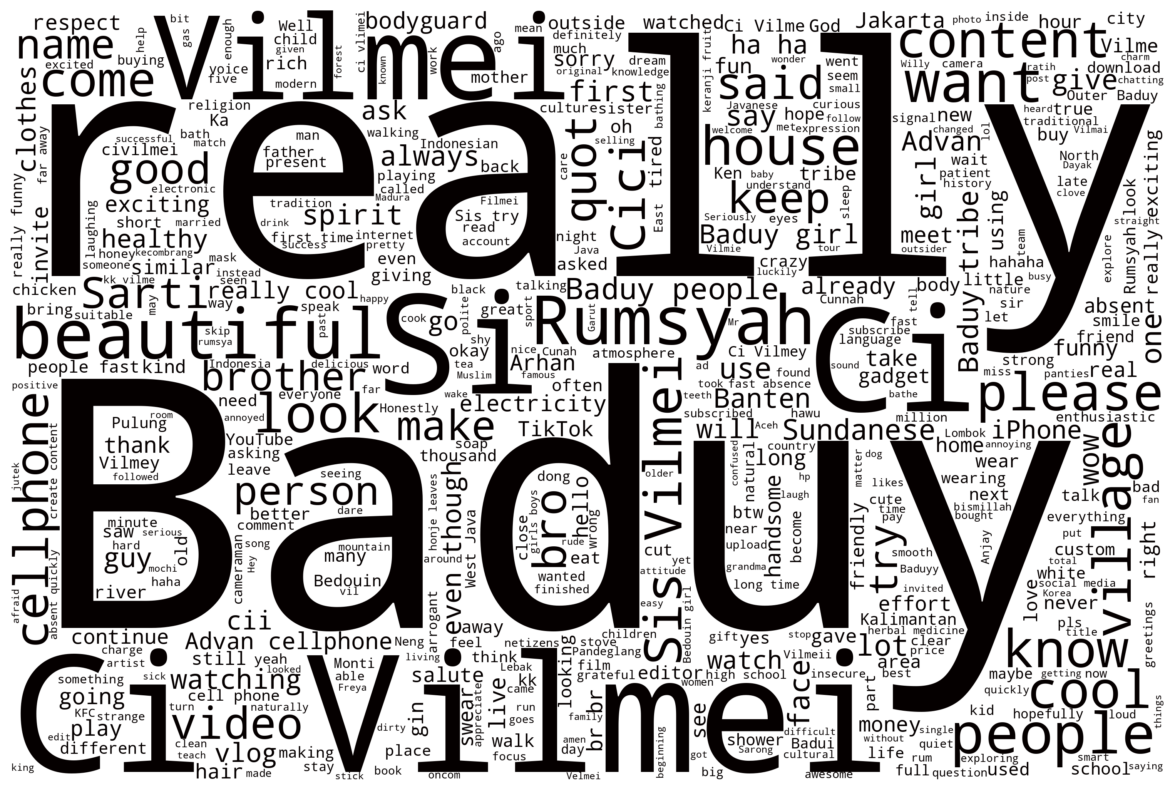

In [128]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/comments_translate_sarti_content.xlsx')

# Assuming the text data is in a specific column (replace 'comments' with the correct column name)
text = " ".join(df['Comment'].dropna().astype(str))

# Define a function to set the word color to black
def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return("hsl(0, 100%, 1%)")

# Generate the word cloud
wc = WordCloud(background_color="white",           # select background color
               width=3000,                         # set width
               height=2000,                        # set height
               max_words=500).generate(text)       # set max amount of words

# Apply the black color function
wc.recolor(color_func=black_color_func)

# Plot the word cloud
plt.figure(figsize=[15, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()


# 2. Google Search

**1. Baduy**

In [129]:
# Mengatur ulang plotting dan menyimpan file dalam direktori yang sesuai
import os
import pandas as pd
import matplotlib.pyplot as plt

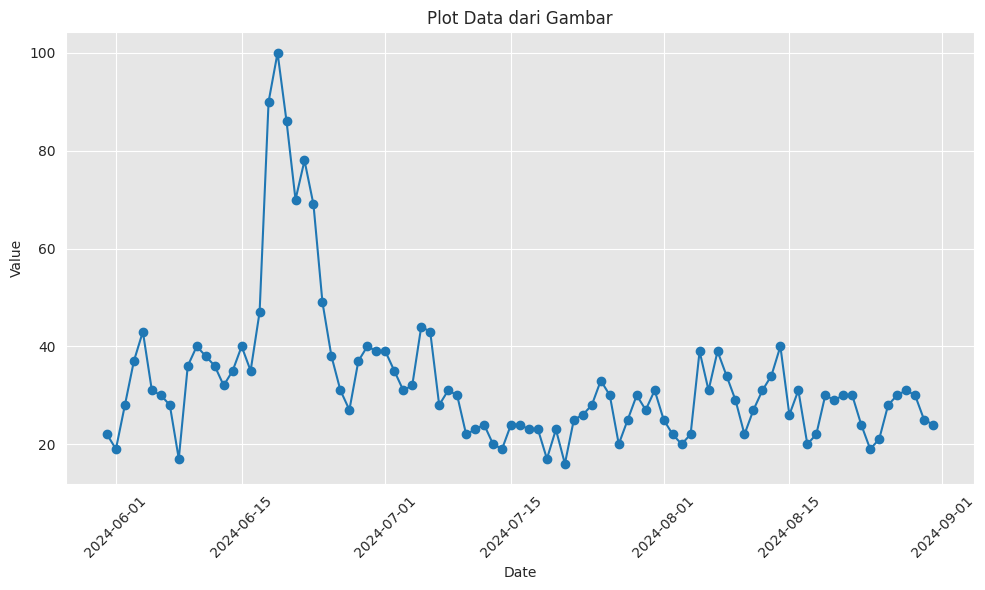

In [137]:
# Membuat DataFrame dari data
df = pd.read_csv("/content/search_suku_baduy.csv")

# Mengubah kolom 'Date' menjadi tipe data datetime
df["Date"] = pd.to_datetime(df["Date"])

# Plotting data
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Value"], marker="o")
plt.title("Plot Data dari Gambar")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Sarti Baduy**

'/mnt/data/time_series_plot.png'

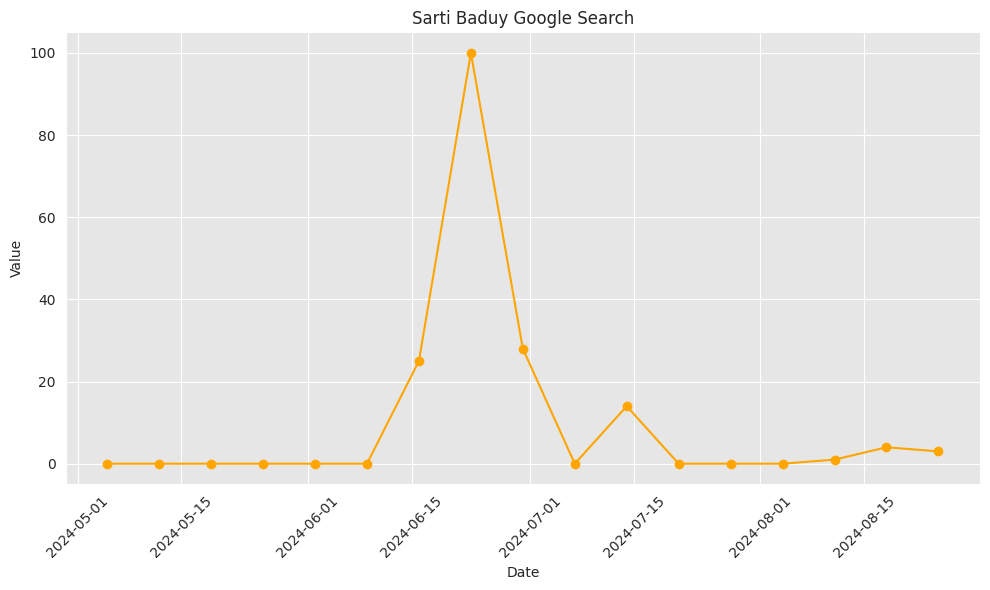

In [87]:
# Memastikan direktori tujuan ada
output_dir = '/mnt/data/'
os.makedirs(output_dir, exist_ok=True)

# Data yang akan digunakan
data = [
    ["2024-05-05", 0],
    ["2024-05-12", 0],
    ["2024-05-19", 0],
    ["2024-05-26", 0],
    ["2024-06-02", 0],
    ["2024-06-09", 0],
    ["2024-06-16", 25],
    ["2024-06-23", 100],
    ["2024-06-30", 28],
    ["2024-07-07", 0],
    ["2024-07-14", 14],
    ["2024-07-21", 0],
    ["2024-07-28", 0],
    ["2024-08-04", 0],
    ["2024-08-11", 1],
    ["2024-08-18", 4],
    ["2024-08-25", 3]
]

# Mengubah data menjadi DataFrame
df = pd.DataFrame(data, columns=['Date', 'Value'])
df['Date'] = pd.to_datetime(df['Date'])

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], marker='o', color='orange')
plt.title('Sarti Baduy Google Search')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menyimpan plot ke file
save_path = os.path.join(output_dir, 'time_series_plot.png')
plt.savefig(save_path)

save_path

**3. Rumsyah Baduy**

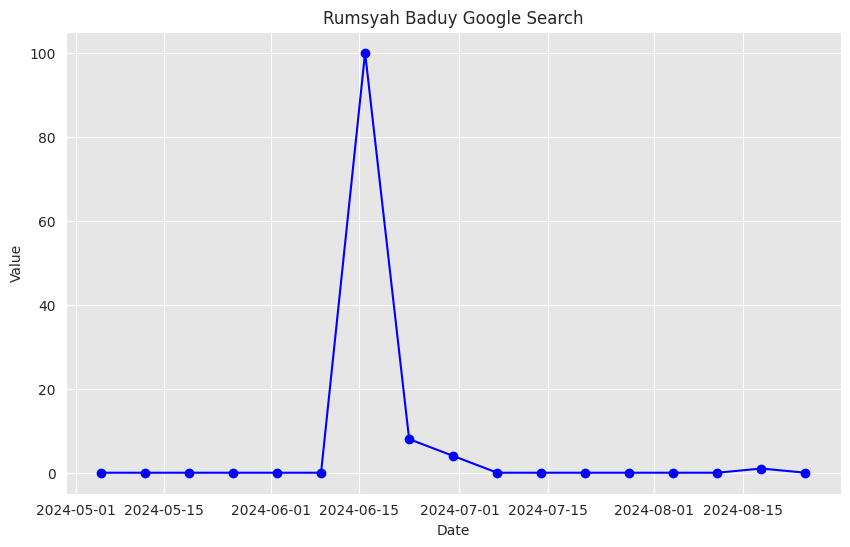

'/mnt/data/time_series_plot.png'

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Combined data from both sets
data = {
    "date": [
        "2024-05-05", "2024-05-12", "2024-05-19", "2024-05-26",
        "2024-06-02", "2024-06-09", "2024-06-16", "2024-06-23",
        "2024-06-30", "2024-07-07", "2024-07-14", "2024-07-21",
        "2024-07-28", "2024-08-04", "2024-08-11", "2024-08-18",
        "2024-08-25"
    ],
    "value": [
        0, 0, 0, 0,
        0, 0, 100,
        8, 4, 0, 0,
        0, 0, 0, 0,
        1, 0]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='blue')
plt.title('Rumsyah Baduy Google Search')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Save the plot
save_path = '/mnt/data/time_series_plot.png'
plt.savefig(save_path)

# Display the plot
plt.show()

save_path


# 3. Tiktok Content

1. Content Sarti Tiktok di vm.**co**

  Like : 287.8K
  
  Comments : 590
  
  Archive : 11.6K

In [141]:
import pandas as pd
import re

# Data
content_sarti = pd.read_csv('content_sarti.csv')
content_sarti


,Unnamed: 0,Komentar,Like
0,0,muntahan ikan paus emg wangi uyy🙂,1550
1,1,"""yg bikin wangi nya tahan lama""",81
2,2,aelah malah ada si rumsyah,51
3,3,🗿,1
4,4,Lebih suka sarti dari pada rumsah😂,2094
...,...,...,...
83,83,kemarin juga sarti sama rumsyah di undang ci?,0
84,84,kenapa sarti mau bego?,0
85,85,pasti lebih banyak foto sarti,0
86,86,itupun sarti yg mungkin dipilih ci?,0


In [ ]:
df.shape

2. Content Rumsyah Baduy di vm.co

  Like : 329.7K
  
  Comments : 1517
  
  Archive : 14.9K

In [ ]:
pip install openpyxl

In [148]:
import pandas as pd

content_rumsyah = pd.read_csv('/content/content_rumsyah.csv')
content_rumsyah.head()


,Unnamed: 0,Komentar
0,0,"rumsyah pas sama cewek 😐😒🙄🫤,"
1,1,"rumsyah pas sama cowok 🥰🤪😘😆,"
2,2,"iyaa😭🗿,"
3,3,"sapatau lgi mls ngomong 🤣🗿,"
4,4,"bner bgt😂,"


# 4. Instagram

In [149]:
instagram_er = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/instagram ER.xlsx')
instagram_er.head()

,Date,Like,Comment,rate,Jenis Content
0,2024-05-03,1223,287,0.426554,produk
1,2024-05-15,310,8,0.089831,produk
2,2024-05-15,1166,222,0.392090,produk
3,2024-05-19,1457,27,0.419209,Vilmei
4,2024-05-19,4370,866,1.479096,Vilmei


In [150]:
# Load packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [151]:
# Understand the variables
pd.options.display.max_colwidth = 100
pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/instagram ER.xlsx', index_col=0)

In [152]:
print(instagram_er.columns)


Index(['Date', 'Like ', 'Comment', 'rate', 'Jenis Content'], dtype='object')


In [153]:
# Split the data into X and y
# You can adapt the input and output columns to fit your own data
input_cols = ['Like ', 'Comment', 'rate']
output_col = ['Date']
X = instagram_er[input_cols]
y = instagram_er[output_col]

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

In [155]:
# Function to flatten 2D lists so it can be used by plotly
def flatten(l):
    return [item for sublist in l for item in sublist]

# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Flatten the prediction and expected lists
predicted = flatten(lin_reg.predict(X_test))
expected = flatten(y_test.values)

In [157]:
print(instagram_er.columns)

Index(['Date', 'Like ', 'Comment', 'rate', 'Jenis Content'], dtype='object')


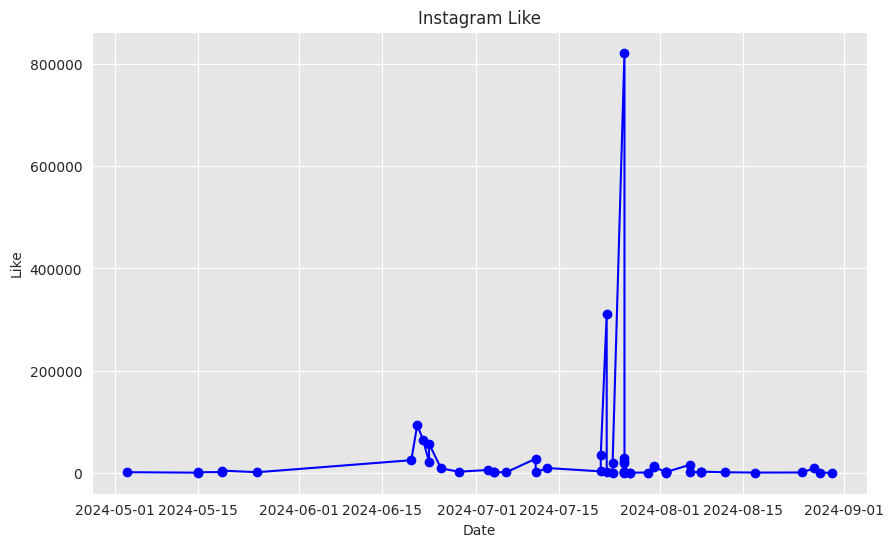

'/mnt/data/time_series_plot.png'

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

# Combined data from both sets
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/instagram ER.xlsx')

# Convert data into a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Like '], marker='o', linestyle='-', color='blue')
plt.title('Instagram Like')
plt.xlabel('Date')
plt.ylabel('Like')
plt.grid(True)

# Save the plot
save_path = '/mnt/data/time_series_plot.png'
plt.savefig(save_path)

# Display the plot
plt.show()

save_path

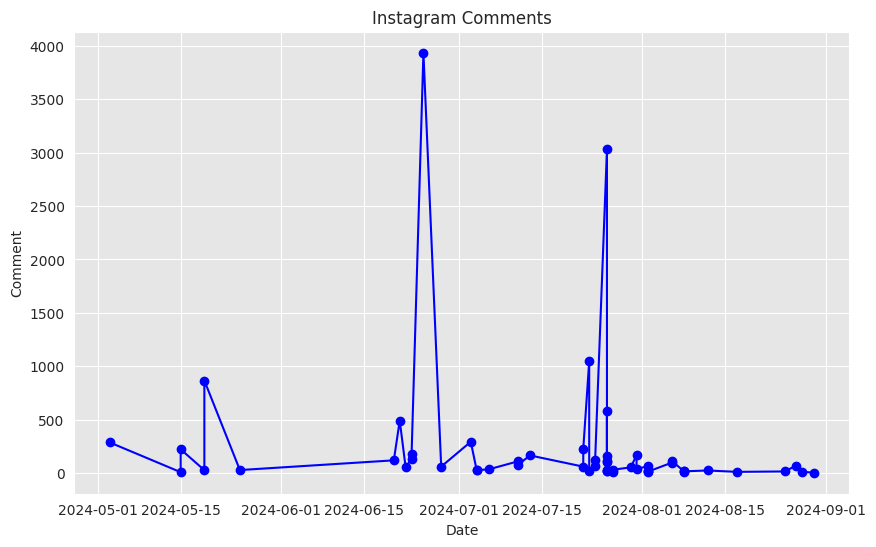

'/mnt/data/time_series_plot.png'

In [159]:
import matplotlib.pyplot as plt
import pandas as pd

# Combined data from both sets
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/instagram ER.xlsx')

# Convert data into a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Comment'], marker='o', linestyle='-', color='blue')
plt.title('Instagram Comments')
plt.xlabel('Date')
plt.ylabel('Comment')
plt.grid(True)

# Save the plot
save_path = '/mnt/data/time_series_plot.png'
plt.savefig(save_path)

# Display the plot
plt.show()

save_path

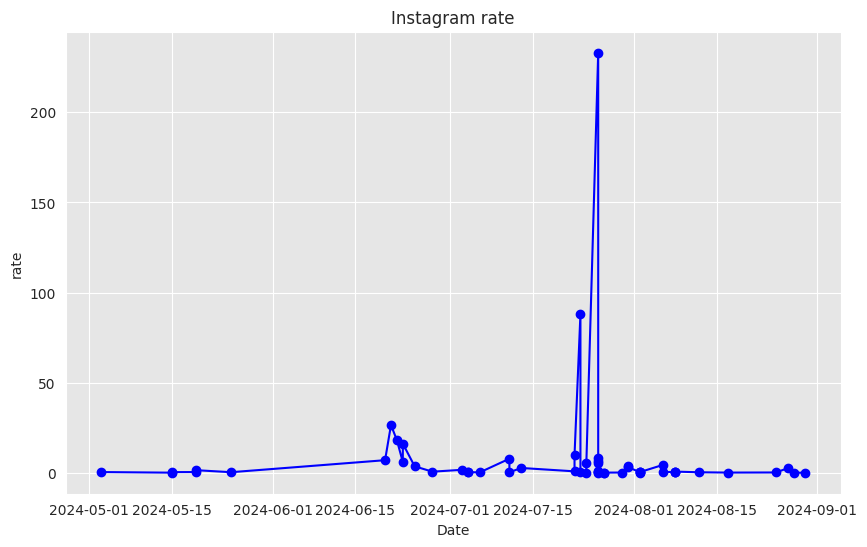

'/mnt/data/time_series_plot.png'

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Combined data from both sets
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Fille/instagram ER.xlsx')

# Convert data into a DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['rate'], marker='o', linestyle='-', color='blue')
plt.title('Instagram rate')
plt.xlabel('Date')
plt.ylabel('rate')
plt.grid(True)

# Save the plot
save_path = '/mnt/data/time_series_plot.png'
plt.savefig(save_path)

# Display the plot
plt.show()

save_path

# 5. Shopee Anlysis

test